In [1]:
import numpy as np
import pandas as pd


# import time
import matplotlib as mpl
import matplotlib.pyplot as plt

## pick your favorite style: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-v0_8-darkgrid") # mpl.__version__ == '3.6.2'
plt.rcParams['font.family'] = 'serif'
cmap = mpl.cm.hsv # colormap
%matplotlib inline

In [2]:
# pick different beta to see how decay rate can change the plots (e.g, beta = 10)
lamb, beta, Q = 0.1, 1, 100

# Exercise 1

The general formula for $I$ is
$$
    I_t = e^{-\beta t} I_0 + \lambda \int_0^t e^{-\beta (t-s)} dQ_s.
$$

1.1 Note that for $t \in [0,1]$
$$
    I_t = \lambda \int_0^t e^{-\beta(t-s)} dQ_s = \frac{\lambda}{\beta}Q(1-e^{-\beta t}).
$$

1.2 For $t \in [0,1]$
$$
    E[Y_t] = -\int_0^t I_s dQ_s = -\frac{\lambda}{\beta}Q^2 \left(t + \frac{1}{\beta}(e^{-\beta t}-1) \right).
$$
and
$$
    E[X_t] = E[Y_t] + E[I_t Q_t] = -\frac{\lambda}{\beta}Q^2 \left((t + \beta^{-1})e^{-\beta t} - \beta^{-1}  \right).
$$

1.3 For $t \in (1,2]$,
\begin{align}
    I_t &= e^{-\beta(t-1)}\frac{1}{2} I_1 = \frac{\lambda}{2\beta} Q (e^{-\beta(t-1)} - e^{-\beta t}), \\
    E[Y_t] &= E[Y_1] = -\frac{\lambda}{\beta}Q^2 \left(1 + \frac{1}{\beta}(e^{-\beta}-1) \right), \\
    E[X_t] &= \frac{\lambda}{\beta}Q^2 \left( (0.5e^{-\beta(t-1)} + \beta^{-1})(1-e^{-\beta}) - 1 \right)
\end{align}

In [3]:
ts1 = np.linspace(0,1,101)

Is1 = lamb/beta * Q * (1-np.exp(-beta*ts1))
Xs1 = -lamb/beta * Q**2 * ( (ts1+1/beta)*np.exp(-beta*ts1) - 1/beta )
Ys1 = -lamb/beta * Q**2 * (ts1 + (np.exp(-beta*ts1) - 1)/beta)

ts2 = np.linspace(1,2,101)

Is2 = 0.5*lamb/beta * Q * (np.exp(-beta*(ts2-1)) - np.exp(-beta*ts2))
Ys2 = -lamb/beta * Q**2 * (1 + (np.exp(-beta)-1)/beta) * np.ones_like(ts2)
Xs2 = lamb/beta * Q**2 * ( (0.5*np.exp(-beta*(ts2-1))+1/beta)*(1-np.exp(-beta)) - 1)

Is = np.concatenate((Is1, Is2[1:]), axis=None)
Xs = np.concatenate((Xs1, Xs2[1:]), axis=None)
Ys = np.concatenate((Ys1, Ys2[1:]), axis=None)

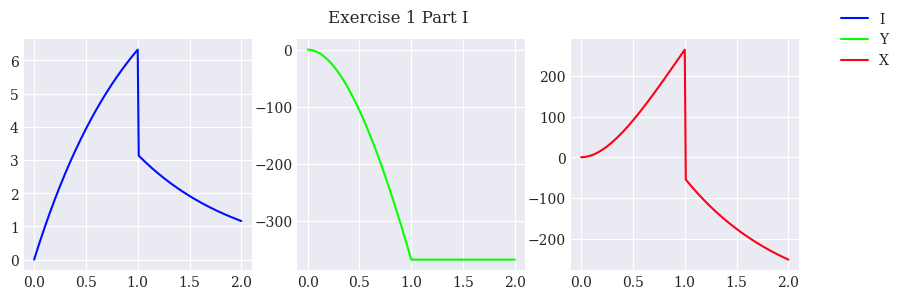

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
cmap = mpl.cm.hsv
ts = np.linspace(0,2,201)

axes[0].plot(ts, Is, label='I', color=cmap(2/3))
axes[1].plot(ts, Ys, label='Y', color=cmap(1/3))
axes[2].plot(ts, Xs, label='X', color=cmap(3/3))

fig.suptitle("Exercise 1 Part I")
fig.legend();

# Exercise 1 Part II (cont'd)

2.2 For $t \in [0,1]$, we have
\begin{align}
    I_t &= \int_0^t e^{-\beta(t-s)} \frac{\lambda}{v_s} dQ_s = \lambda Q \int_0^t e^{-\beta(t-s)-4(s-0.7)^2} ds
\end{align}
and for $t \in (1,2]$, we have
$$
    I_t = \frac{1}{2} e^{-\beta(t-1)} I_1.
$$
For $t \in [0,2]$,
\begin{align}
    E[Y_t] &= -\int_0^t I_s dQ_s \\
    E[X_t] &= E[Y_t] + E[I_t Q_t]
\end{align}

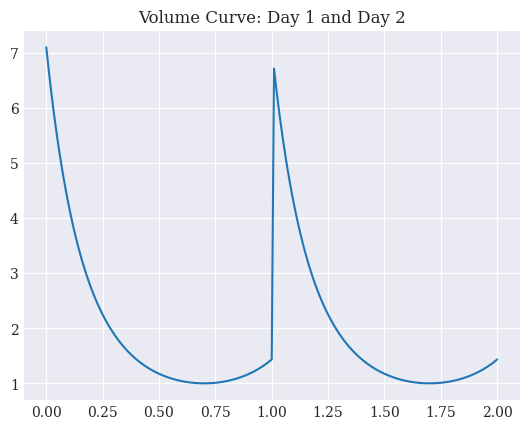

In [5]:
vs1 = np.exp(4*(ts1-.7)**2)
vs2 = np.exp(4*(ts2-1.7)**2)

vs = np.concatenate([vs1, vs2[1:]], axis=None)
plt.plot(ts, vs)
plt.title("Volume Curve: Day 1 and Day 2");

In [6]:
ts1, dt = np.linspace(0,1,101), 1/100

integral = np.exp(beta*ts1-4*(ts1-.7)**2).cumsum() * dt
Is1 = lamb*Q * np.exp(-beta*ts1) * integral
Ys1 = -Q * Is1.cumsum() * dt
Xs1 = Ys1 + Is1*ts1*Q
                                          
ts2 = np.linspace(1,2,101)

Is2 = 0.5*Is1[-1] * np.exp(-beta*(ts2-1))
Ys2 = Ys1[-1] * np.ones_like(ts2)
Xs2 = Ys2 + Is2 * Q

Is = np.concatenate((Is1, Is2[1:]), axis=None)
Xs = np.concatenate((Xs1, Xs2[1:]), axis=None)
Ys = np.concatenate((Ys1, Ys2[1:]), axis=None)

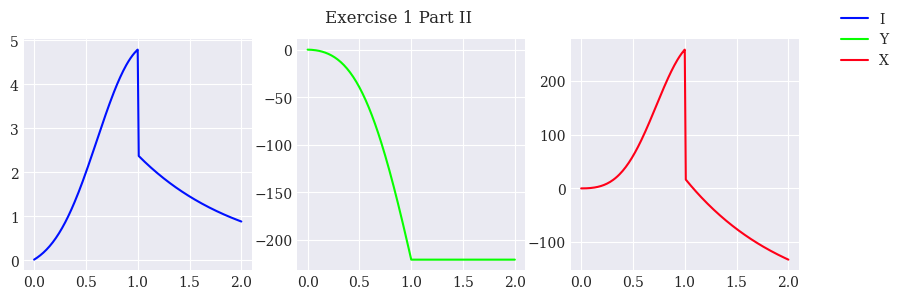

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
cmap = mpl.cm.hsv
ts = np.linspace(0,2,201)

axes[0].plot(ts, Is, label='I', color=cmap(2/3))
axes[1].plot(ts, Ys, label='Y', color=cmap(1/3))
axes[2].plot(ts, Xs, label='X', color=cmap(3/3))

fig.suptitle("Exercise 1 Part II")
fig.legend();

# Exercise 2.1

This solution maps the objective function into impact space for a slightly more general setting: with general $h\in C^1$ and continuous, bounded semimartingale $\alpha_t$. Expressing $E\left[Y_T\right]$ in terms of $J$ instead of $Q$ yields
\begin{align*}
E\left[Y_T\right] &= \frac{1}{\lambda}E\left[\int_0^T \left(\alpha_t - h(J_t)\right)(\beta J_t dt + dJ_t) -\frac{1}{2}\int_0^T h'(J_t)d[J,J]_t + [\alpha,J]_T\right].
\end{align*}
This expectation divides into three terms:
(a)
 The term
\begin{equation*}
\frac{1}{\lambda}E\left[\int_0^T \left(\alpha_t - h(J_t)\right)\beta J_t dt\right]
\end{equation*}
is myopic.

(b) The term
\begin{equation*}
-\frac{1}{\lambda}E\left[\int_0^T h(J_t) dJ_t +\frac{1}{2}\int_0^T h'(J_t)d[J,J]_t\right]
\end{equation*}
evokes the Ito formula for $H(\bar{J}_T)$, where $H$ is the anti-derivative of $h$. Applying It\^o's formula proves
\begin{align*}
H(\bar{J}_T) &= \int_0^T h(J_t)dJ_t + \frac{1}{2}\int_0^T h'(J_t)d[J,J]_t.
\end{align*}

(c) By Ito, the remaining term satisfies
\begin{equation*}
\int_0^T \alpha_t dJ_t + [\alpha,J]_T  = - \int_0^T J_t d\alpha_t.
\end{equation*}

The three terms combine to conclude with the formula
\begin{align*}
E\left[Y_T\right] &= E\left[\alpha_T J_T- H(J_T) + \int_0^T  \left(\beta \alpha J_t - \alpha'_t J_t- \beta h(J_t)J_t\right) dt\right] \\
									 &= E\left[-\frac{1}{1+c}|J_T|^{1+c} - \int_0^T \beta |J_t|^{1+c} dt\right].
\end{align*}
where the last equality holds for the given $h$ in this problem and $\alpha_t = 0$ due to $S$ being a martingale.

# Exercise 2.2

Adding a Lagrange multiplier $\eta$ leads to the objective function
\begin{equation*}
E\left[\eta J_T -\frac{1}{1+c}|J_T|^{1+c} + \int_0^T \beta \left(\eta J_t - |J_t|^{1+c}\right) dt\right].
\end{equation*}

Therefore, the optimal impact state $I^*_t$ satisfies
\begin{equation*}
\forall t\in (0,T), \quad I^*_t = \text{sign}(J^*_t)\left|J^*_t\right|^c = \frac{\eta}{1+c}; \quad I^*_T = \eta.
\end{equation*}

The constraint yields the equation
\begin{align*}
\lambda Q &= J_T + \beta \int_0^T J_t dt \\
				  &= \eta^{1/c}\left(1 + \frac{\beta T}{(1+c)^{1/c}}\right).
\end{align*}

Therefore, one has
\begin{equation*}
\eta = (1+c)\left(\frac{\lambda Q}{(1+c)^{1/c} + \beta T}\right)^c.
\end{equation*}

The solution is like the original OW optimal execution problem, which one recovers when $c = 1$. Indeed, the optimal trading strategy targets a constant impact level, exhibits two jumps at times $t =0,T$, and trades along a TWAP schedule over $(0,T)$.

Global concavity $c<1$ changes the target impact level
\begin{equation*}
\forall t \in (0,T), \quad I^*_t = \left(\frac{\lambda Q}{(1+c)^{1/c} + \beta T}\right)^c \quad I^*_T = (1+c)\left(\frac{\lambda Q}{(1+c)^{1/c} + \beta T}\right)^c.
\end{equation*}
The relationship between $I_T$ and $Q$ is concave.

## Exercise 2.3
For a TWAP order, $dQ_t = \frac{Q}{T} dt$. Therefore, one has
\begin{align*}
J_T &= \int_0^T e^{-\beta(t-s)} \frac{\lambda Q}{T}ds \\
		&= \frac{\lambda Q}{\beta T}\left(1 - e^{-\beta T}\right)
\end{align*}
and hence, 
\begin{equation*}
I_T = \left(\frac{\lambda Q}{\beta T}\left(1 - e^{-\beta T}\right)\right)^c.
\end{equation*}
The relationship between $I_T$ and $Q$ is concave.